In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv("survey lung cancer.csv")

In [3]:
df.shape

(309, 16)

In [4]:
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [5]:
# converting all 1,2 to 0,1 

In [6]:
def replace(x):
    df1=df[x].replace([1,2],[0,1])
    return df1

In [7]:
df["SMOKING"].replace([1,2],[0,1],inplace=True)



In [8]:
columns=[d for d in df.columns]

In [9]:
for i in columns :
    df[i].replace([1,2],[0,1],inplace=True)

In [10]:
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,0,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,0,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaller=MinMaxScaler()

In [18]:
df[["AGE"]]=scaller.fit_transform(df[["AGE"]])



In [19]:
#replacing no, yes and male, female to 0,1

In [20]:
df["GENDER"].replace(["M","F"],[0,1],inplace=True)
df["LUNG_CANCER"].replace(["NO","YES"],[0,1],inplace=True)

In [22]:
df.head(5)#final data set

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,0.727273,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,0.803030,0,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,0.575758,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,0.636364,0,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,0.636364,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [23]:
##model bulding

In [24]:
x=df.drop("LUNG_CANCER",axis=1)

In [25]:
y=df["LUNG_CANCER"]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=76)

In [27]:
x_train.shape


(216, 15)

In [28]:
x_test.shape

(93, 15)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [31]:
model.score(x_train,y_train)

0.9398148148148148

In [32]:
pre=model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
accuracy_score(y_test,pre)

0.8494623655913979

In [36]:
cm=confusion_matrix(y_test,pre)

Text(33.0, 0.5, 'True')

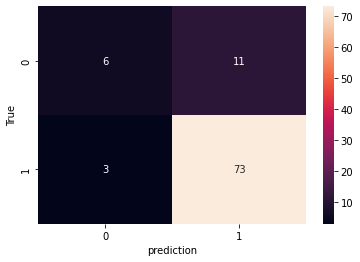

In [40]:
plt.Figure(figsize=(10,8))
plt.axis
sns.heatmap(cm,fmt="d",annot=True)
plt.xlabel("prediction")
plt.ylabel("True")

In [41]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.67      0.35      0.46        17
           1       0.87      0.96      0.91        76

    accuracy                           0.85        93
   macro avg       0.77      0.66      0.69        93
weighted avg       0.83      0.85      0.83        93



# Useing Artifical Nural Network 

In [52]:
from tensorflow import keras
import tensorflow as tf

In [45]:
ann=keras.models.Sequential([
    
    keras.layers.Dense(30,input_shape=(15,),activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

ann.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=20)

Epoch 1/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6071 - accuracy: 0.8333
Epoch 2/20
7/7 [==============================] - 0s 1ms/step - loss: 0.5370 - accuracy: 0.9120
Epoch 3/20
7/7 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.8981
Epoch 4/20
7/7 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8981
Epoch 5/20
7/7 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8981
Epoch 6/20
7/7 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8981
Epoch 7/20
7/7 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.8981
Epoch 8/20
7/7 [==============================] - 0s 2ms/step - loss: 0.2600 - accuracy: 0.8981
Epoch 9/20
7/7 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.8981
Epoch 10/20
7/7 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.8981
Epoch 11/20
7/7 [======================

In [46]:
ann.evaluate(x_test,y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.3638 - accuracy: 0.8172


[0.3638486862182617, 0.8172042965888977]

In [47]:
yp=ann.predict(x_test)

In [48]:
yp[:5]

array([[0.96374005],
       [0.9459382 ],
       [0.95648307],
       [0.96516335],
       [0.96436405]], dtype=float32)

In [49]:
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.82      1.00      0.90        76

    accuracy                           0.82        93
   macro avg       0.41      0.50      0.45        93
weighted avg       0.67      0.82      0.74        93



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
cm_ann=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

Text(33.0, 0.5, 'True')

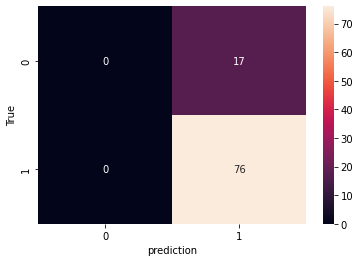

In [54]:
sns.heatmap(cm_ann,annot=True,fmt='d')
plt.xlabel("prediction")
plt.ylabel("True")